In [42]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  

In [1]:
import torch

In [26]:
x = torch.rand(1, 3)
y = torch.rand(5, 3)

In [29]:
z = torch.div(x,y)
z

tensor([[1.4356, 0.4628, 0.5993],
        [2.0171, 0.1217, 0.6163],
        [0.9590, 0.0727, 1.2180],
        [1.3957, 0.0524, 3.7352],
        [2.0483, 0.0604, 1.2842]])

In [32]:
if torch.cuda.is_available():
    dev = torch.device("cuda")
    z = z.to(dev)
z

tensor([[1.4356, 0.4628, 0.5993],
        [2.0171, 0.1217, 0.6163],
        [0.9590, 0.0727, 1.2180],
        [1.3957, 0.0524, 3.7352],
        [2.0483, 0.0604, 1.2842]])

# Calculatin Gradients in PyTorch

In [33]:
x = torch.randn(3, requires_grad=True)
x

tensor([-0.1274,  1.1277, -0.2668], requires_grad=True)

In [34]:
p = x+3
p

tensor([2.8726, 4.1277, 2.7332], grad_fn=<AddBackward0>)

# Gradient Descent

In [87]:
import numpy as np

X = np.arange(0, 5, dtype=np.float16)
Y = np.arange(0, 10, 2, dtype=np.float16)

In [88]:
w = 0.0

In [89]:
def forward(x):
    return w*x

In [90]:
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

In [91]:
def grd(x,y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

In [92]:
print(forward(5))

0.0


In [93]:
lr = 1e-2
n_itr = 10

In [94]:
for epoch in range(n_itr):
    y_preds = forward(X)
    
    l = loss(Y, y_preds)
    
    dw = grd(X,Y, y_preds)
    
    w -= lr * dw
    
    if epoch % 1 == 0:
        print(epoch+1, w, l)

1 1.2 24.0
2 1.6796875 3.838
3 1.871875 0.6157
4 1.94859375 0.0981
5 1.9797070312499998 0.01613
6 1.9920703124999999 0.002548
7 1.9967578124999998 0.0003662
8 1.9984570312499998 4.83e-05
9 1.9997460937499998 2.825e-05
10 1.9997460937499998 0.0


# Using Torch

In [106]:
X = torch.tensor([0, 1, 2, 3, 4, 5], dtype=torch.float32)
Y = torch.tensor([0, 2, 4, 6, 8, 10], dtype=torch.float32)

In [107]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [114]:
lr = 1e-3
n_itr = 500

In [115]:
for epoch in range(n_itr):
    y_preds = forward(X)
    
    l = loss(Y, y_preds)
    
    l.backward()
    with torch.no_grad():
        w -= lr * w.grad
    
    w.grad.zero_()
    if epoch % 10 == 0:
        print(epoch+1, w, l)

1 tensor(1.9840, requires_grad=True) tensor(0.0024, grad_fn=<MeanBackward0>)
11 tensor(1.9867, requires_grad=True) tensor(0.0017, grad_fn=<MeanBackward0>)
21 tensor(1.9890, requires_grad=True) tensor(0.0012, grad_fn=<MeanBackward0>)
31 tensor(1.9908, requires_grad=True) tensor(0.0008, grad_fn=<MeanBackward0>)
41 tensor(1.9924, requires_grad=True) tensor(0.0006, grad_fn=<MeanBackward0>)
51 tensor(1.9937, requires_grad=True) tensor(0.0004, grad_fn=<MeanBackward0>)
61 tensor(1.9947, requires_grad=True) tensor(0.0003, grad_fn=<MeanBackward0>)
71 tensor(1.9956, requires_grad=True) tensor(0.0002, grad_fn=<MeanBackward0>)
81 tensor(1.9964, requires_grad=True) tensor(0.0001, grad_fn=<MeanBackward0>)
91 tensor(1.9970, requires_grad=True) tensor(8.6926e-05, grad_fn=<MeanBackward0>)
101 tensor(1.9975, requires_grad=True) tensor(6.0038e-05, grad_fn=<MeanBackward0>)
111 tensor(1.9979, requires_grad=True) tensor(4.1468e-05, grad_fn=<MeanBackward0>)
121 tensor(1.9983, requires_grad=True) tensor(2.864

# Implimenting Piplines

In [133]:
import torch.nn as nn

In [129]:
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
Y = torch.tensor([0, 2, 4, 6, 8, 10], dtype=torch.float32)

In [130]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [131]:
l_r = 1e-2
n_itr = 20

l = torch.nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = l_r)

In [132]:
for epoch in range(n_itr):
    y_preds = forward(X)
    
    l = loss(Y, y_preds)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    w.grad.zero_()
    if epoch % 1 == 0:
        print(epoch+1, w, l)

1 tensor(0.4667, requires_grad=True) tensor(36.6667, grad_fn=<MeanBackward0>)
2 tensor(0.7918, requires_grad=True) tensor(18.1919, grad_fn=<MeanBackward0>)
3 tensor(1.0183, requires_grad=True) tensor(9.2252, grad_fn=<MeanBackward0>)
4 tensor(1.1761, requires_grad=True) tensor(4.8733, grad_fn=<MeanBackward0>)
5 tensor(1.2860, requires_grad=True) tensor(2.7611, grad_fn=<MeanBackward0>)
6 tensor(1.3626, requires_grad=True) tensor(1.7360, grad_fn=<MeanBackward0>)
7 tensor(1.4159, requires_grad=True) tensor(1.2384, grad_fn=<MeanBackward0>)
8 tensor(1.4531, requires_grad=True) tensor(0.9970, grad_fn=<MeanBackward0>)
9 tensor(1.4790, requires_grad=True) tensor(0.8798, grad_fn=<MeanBackward0>)
10 tensor(1.4970, requires_grad=True) tensor(0.8229, grad_fn=<MeanBackward0>)
11 tensor(1.5096, requires_grad=True) tensor(0.7953, grad_fn=<MeanBackward0>)
12 tensor(1.5184, requires_grad=True) tensor(0.7819, grad_fn=<MeanBackward0>)
13 tensor(1.5245, requires_grad=True) tensor(0.7754, grad_fn=<MeanBackw

# Linear Regression Using Torch

In [135]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [136]:
X_n, y_n = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=2)

In [142]:
X = torch.from_numpy(X_n.astype(np.float32))
y = torch.from_numpy(y_n.astype(np.float32))
y = y.view(y.shape[0], 1) # .view is a built in Torch function used for reshaping the Tensor

In [143]:
n_samp, n_feat = X.shape

In [170]:
l_r = 1e-2
n_itr = 200

In [171]:
# Model

model = nn.Linear(n_feat, 1)

In [172]:
# Loss & OPtimizers

crit = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=l_r)

In [173]:
for epoch in range(n_itr):
    y_pred = model(X)
    loss = crit(y_pred, y)
    
    loss.backward()
    
    opt.step()
    
    opt.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(epoch+1, loss.item())

10 2815.481201171875
20 1938.275146484375
30 1374.9259033203125
40 1012.5250244140625
50 778.9820556640625
60 628.2049560546875
70 530.6785278320312
80 467.4737854003906
90 426.4307861328125
100 399.7250061035156
110 382.31231689453125
120 370.9351501464844
130 363.4859619140625
140 358.5983581542969
150 355.3846740722656
160 353.2672119140625
170 351.869140625
180 350.9441833496094
190 350.3309631347656
200 349.92364501953125


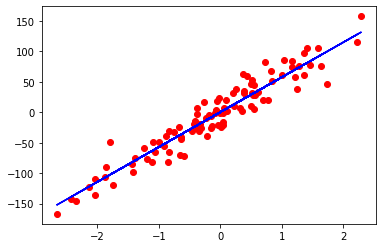

In [174]:
p = model(X).detach().numpy()
plt.plot(X_n, y_n, 'ro')
plt.plot(X_n, p, 'b')
plt.show()

# Testing

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [44]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]
)

In [9]:
# datasets
trainset = torchvision.datasets.FashionMNIST('/dataset/',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('/dataset/',
    download=True,
    train=False,
    transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /dataset/FashionMNIST\raw\train-images-idx3-ubyte.gz to /dataset/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /dataset/FashionMNIST\raw\train-labels-idx1-ubyte.gz to /dataset/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /dataset/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /dataset/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /dataset/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /dataset/FashionMNIST\raw



In [11]:
train_load = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

In [12]:
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [13]:
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.pool1=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# NEW

In [21]:
train_data = torchvision.datasets.FashionMNIST(
    root='/dataset/FAshMnist',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

test_data = torchvision.datasets.FashionMNIST(
    root='/dataset/FAshMnist',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /dataset/FAshMnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to /dataset/FAshMnist\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /dataset/FAshMnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to /dataset/FAshMnist\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /dataset/FAshMnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /dataset/FAshMnist\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /dataset/FAshMnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /dataset/FAshMnist\FashionMNIST\raw



In [22]:
len(train_data), len(test_data)

(60000, 10000)

In [24]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
idx_class = train_data.class_to_idx
idx_class

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [26]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# Visualization

torch.Size([1, 28, 28])


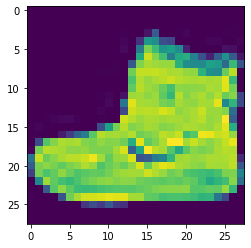

In [30]:
image, labels = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())

In [49]:
# MiniBatches

BATCH_SIZE=16

from torch.utils.data import DataLoader
train_dl = DataLoader(train_data,shuffle=True, batch_size=BATCH_SIZE, num_workers=2)
test_dl = DataLoader(test_data,shuffle=False, batch_size=BATCH_SIZE, num_workers=2)

In [50]:
# MOdeling

fl_mod = nn.Flatten()


class FashMNIST(nn.Module):
    def __init__(self, 
                in_shape: int,
                hid_units: int,
                out_shape: int):
        super().__init__()
        
        self.Seq = nn.Sequential(
            fl_mod,
            nn.Linear(in_features=in_shape,
                     out_features=hid_units),
            nn.Linear(in_features=hid_units,
                     out_features=out_shape),
        )
        
        
    def forward(self, x):
        return self.Seq(x)

In [51]:
# Setting Model input Parameters

model = FashMNIST(in_shape=28*28,
                 hid_units=8,
                 out_shape=len(class_names)).to("cpu")

model

FashMNIST(
  (Seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [52]:
model.state_dict()

OrderedDict([('Seq.1.weight',
              tensor([[-0.0263, -0.0004, -0.0185,  ...,  0.0227,  0.0332, -0.0334],
                      [ 0.0277,  0.0299, -0.0248,  ..., -0.0299, -0.0199,  0.0221],
                      [-0.0209,  0.0099,  0.0035,  ...,  0.0224,  0.0063,  0.0115],
                      ...,
                      [ 0.0030, -0.0010,  0.0160,  ...,  0.0302,  0.0314, -0.0080],
                      [-0.0335, -0.0285, -0.0186,  ..., -0.0327, -0.0324,  0.0145],
                      [-0.0190,  0.0204,  0.0182,  ...,  0.0050,  0.0140,  0.0307]])),
             ('Seq.1.bias',
              tensor([ 0.0034, -0.0352,  0.0051,  0.0323, -0.0012,  0.0091, -0.0161, -0.0060])),
             ('Seq.2.weight',
              tensor([[-0.2741, -0.3297,  0.0896,  0.3287,  0.2929, -0.1550, -0.1182, -0.1005],
                      [-0.0965, -0.1075, -0.0739,  0.0617,  0.1784,  0.1959,  0.1774, -0.3054],
                      [ 0.3017,  0.0170, -0.1403,  0.1046,  0.2944,  0.1232,  0.0134, -0.

### We Can Create a seperate helper functions file save it as a .py file and load it later as a pythons script in different models to avoid writing useful light functions again and again.

In [53]:
# Setting up Loss Function And Optimizers

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=model.parameters(),lr=1e-1)

In [ ]:
# Creating Training Loop

from tqdm.auto import tqdm

epochs = 5

for ep in tqdm(range(epochs)):
    
    train_loss = 0
    
    for bat, (X, y) in enumerate(train_dl):
        model.train()
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
    if bat % 400 == 0:
        print(batch * len(X)/len(train_dl.dataset))
    
    train_loss /= len(train_dl)
    
    test_loss, test_acc = 0,0
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dl:
            
            test_pred = model(X_test)
            
            test_loss += loss_fn(test_pred, y_pred)
            

  0%|          | 0/5 [00:00<?, ?it/s]